In [3]:
from PIL import Image
import cv2 
import numpy as np
from pathlib import Path
import os, shutil
from os import listdir
import pickle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import pickle
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
with open(os.path.join(r"C:\Users\g_bab\Downloads",'myDictionaryrocket.pkl'), "rb") as f:
    one_hots_dict = pickle.load(f)

In [6]:
#base square size
M, N = 100, 100

In [7]:
im = Image.open(r"C:\Users\g_bab\Downloads\square landscape.jpg")
im = np.array(im)
rangex = range(0, im.shape[0], M)
rangey = range(0,im.shape[1],N)

tiles = [im[x:x+M,y:y+N] for x in rangex for y in rangey]


150


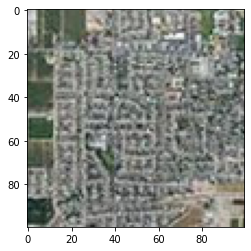

In [9]:
fig, ax = plt.subplots()
count=0 
for i in range(len(tiles)):
    ax.imshow(tiles[i])
    count+=1
print(count)

In [ ]:
keypointslist = []       #will have number of classes number of keypoints
descriptorslist = []     #will have number of classes number of descriptor vectors   <-- important thing
for i in tiles:
    img1 = cv2.imread(i)   
    #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    might uncomment later

    #sift
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img1,None)
    
    keypointslist.append(keypoints)
    descriptorslist.append(descriptors)
    
    print(len(keypoints))

In [ ]:
#test with all our distorted images and see how many guesses come back right

In [ ]:
#use this to check that its actually looking for the right stuff
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)